In [3]:
pip install geopy

Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install geocoder


Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install geopandas

Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from geopy.distance import distance


In [52]:
# df= pd.read_csv('national-charge-point-registry.csv')
# df=df.fillna(value=0)
# # Initialize a geolocator instance to get the county information
# geolocator = Nominatim(user_agent='myapp')

# # Define a function to get the county information from latitude and longitude coordinates
# def get_county(latitude, longitude):
#     location = geolocator.reverse((latitude, longitude), exactly_one=True)
#     if location:
#         address = location.raw.get('address')
#         if address:
#             return address.get('county')

# # Iterate over each row in the dataframe and add the county column
# for i, row in df.iterrows():
#     df.at[i, 'county'] = get_county(row['latitude'], row['longitude'])
#     print(f"Processed row {i+1} of {len(df)}")
    

# # Print the first 10 rows of the dataframe with the added county column
# print(df.head(10))
# df.to_csv("national-charge-point-registry-final.csv")

In [53]:
# data=pd.read_csv('og18000.csv')
# df = pd.DataFrame(data)

# # drop duplicate rows
# df = df.drop_duplicates()

# # print the updated data frame
# df.to_csv('ogfinal.csv', index=False)

In [54]:
# import pandas as pd
# df1 = pd.read_csv('og24000.csv')
# df2 = pd.read_csv('df_1.csv')
# result = pd.concat([df1, df2], ignore_index=True)
# result.to_csv('og24500.csv', index=False)

In [55]:
# Load the Method of Travel to Work, Local authority district boundaries and National Charge Point Registry processed dataset datasets
travel_df1 = pd.read_csv("methodoftraveltowork.csv")
charge_df = pd.read_csv("og24000.csv")
lad_df= pd.read_csv("LAD_22.csv")
postcode_df=pd.read_csv("postcode_small.csv")
travel_df2= travel_df1.loc[travel_df1['Method of travel to work'] == "Driving a car or van"]
# charge_df
# travel_df
# lad_df

# travel_df = travel_df2.merge(lad_df, left_on = 'LAD Code', right_on = 'LAD22CD')
travel_df3 = lad_df.merge(travel_df2, left_on = 'LAD22CD', right_on = 'LAD Code')
travel_df = travel_df2.reset_index()
# travel_df
# charge_df


postcode_df


C:\Users\az\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,10,11,17,18,54,56,57,58,59,60,61,62,63,64,65,90,101,105,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Unnamed: 0 Postcode 1 County Code         Local Authority Name
0                 0    RM1 3DB   E09000016                     Havering
1                 1    SM1 4NR   E09000029                       Sutton
2                 2    SE218AL   E09000028                    Southwark
3                 3    BR1 4EJ   E09000006                      Bromley
4                 4    DN220QL   E10000024                    Bassetlaw
...             ...        ...         ...                          ...
1778650     1778650    SE1P4GE   E09000028                    Southwark
1778651     1778651    LS7 1PZ   E08000035                        Leeds
1778652     1778652    NE348DU   E08000023               South Tyneside
1778653     1778653    HU3 4AJ   E06000010  Kingston upon Hull, City of
1778654     1778654    LU1 5PZ   E06000032                        Luton

[1778655 rows x 4 columns]

In [56]:
features = ["Postcode 1", "County Code", "Local Authority Name"]

postcode_df1 =postcode_df[features]
postcode_df1.to_csv("postcode_small.csv")

In [57]:

postcode_df1 = postcode_df1.rename(columns={'Postcode 1': 'postcode', 'County Code': 'LAD Code'})
new_df = pd.merge(charge_df, postcode_df1, on='postcode', how='left')
# new_df
df2 =new_df.dropna(subset = ['LAD Code'])
# df2.to_csv("post_lad.csv")
new_df

chargeDeviceID       reference  \
0      9c8661befae6dbcd08304dbf4dcaf0db            SC22   
1      52b738b303d90a884137546353e09ebb            SC23   
2      b58ac8403eb9cf17fae1dcd16df71fde            SC33   
3      fd8c07a31f8a85910ad8476f5f7efb27            SC03   
4      f507783927f2ec2737ba40afbd17efb5            SC19   
...                                 ...             ...   
23995  d44182c4aacdb54f6645f3becb78c249  suby1100009665   
23996  6d54054285d41e43f72b3e9e55d597fa  suby1100009668   
23997  37f88fa58f0c1c97fa2af42a179fe5d2  suby1100009669   
23998  c4f64b47a0c3dada42a2c14bad9ebd99  suby1100009670   
23999  b4becd455a0afa7c02958fb582e12ee9  suby1100009672   

                                           name   latitude  longitude  \
0        Little Victoria St Car Park - Socket 2  54.592703  -5.933430   
1      Little Donegall Street, Belfast (Socket   54.604646  -5.931866   
2             Cromac Street Car Park (Socket 2)  54.594109  -5.924292   
3      Hope Street Car Park, Belfast (Socket 2)  54.593365  -5.935574   
4           Adelaide Street, Belfast (Socket 2)  54.594342  -5.928256   
...                                         ...        ...        ...   
23995                            suby1100009665  51.452285  -0.318079   
23996                            suby1100009668  51.455710  -0.324537   
23997                            suby1100009669  51.472582  -0.241376   
23998                            suby1100009670  51.465864  -0.249184   
23999                            suby1100009672  51.473412  -0.240849   

      subBuildingName                buildingName buildingNumber  \
0                 NaN  DRD Roads Service Car Park              4   
1                 NaN                         NaN            128   
2                 NaN                         NaN          89-97   
3                 NaN                         NaN            205   
4                 NaN                         NaN          23-91   
...               ...                         ...            ...   
23995             NaN                         NaN            NaN   
23996             NaN                         NaN            NaN   
23997             NaN                         NaN            NaN   
23998             NaN                         NaN            NaN   
23999             NaN                         NaN            NaN   

                 thoroughfare        street  ... Unnamed: 103 Unnamed: 104  \
0             Downshire Place           NaN  ...          NaN          NaN   
1      Little Donegall Street           NaN  ...          NaN          NaN   
2               Cromac Street           NaN  ...          NaN          NaN   
3                   Sandy Row  Bruce Street  ...          NaN          NaN   
4             Adelaide Street           NaN  ...          NaN          NaN   
...                       ...           ...  ...          ...          ...   
23995         3 Norman Avenue           NaN  ...          NaN          NaN   
23996   39 South Western Road           NaN  ...          NaN          NaN   
23997         1 Cardigan Road          Opp.  ...          NaN          NaN   
23998         2 Westwood Road           NaN  ...          NaN          NaN   
23999        22 Meredyth Road           NaN  ...          NaN          NaN   

      Unnamed: 105 Unnamed: 106 Unnamed: 107 Unnamed: 108  Unnamed: 109  \
0              NaN          NaN          NaN          NaN           NaN   
1              NaN          NaN          NaN          NaN           NaN   
2              NaN          NaN          NaN          NaN           NaN   
3              NaN          NaN          NaN          NaN           NaN   
4              NaN          NaN          NaN          NaN           NaN   
...            ...          ...          ...          ...           ...   
23995          NaN          NaN          NaN          NaN           NaN   
23996          NaN          NaN          NaN          NaN           NaN   
23997     

In [58]:
pip install folium

Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [59]:
# merged_df = travel_df.merge(charge_df, left_on = 'LAD Name', right_on ='county')
# merged_df = charge_df.merge(travel_df3, left_on = 'county', right_on ='LAD Name')
air=new_df.dropna(subset = ['LAD Code'])
air2= pd.merge(air, lad_df,
                       how='left', left_on='LAD Code', right_on='LAD22CD')

# merged_df= merged_df.drop(["subBuildingName", "buildingName", "street", "thoroughfare","doubleDependantLocality","dependantLocality"])
# merged_df.dropna()
# merged_df.head()
# merged_df.to_csv('test_merged1.csv')
# merged_df
air_quality = pd.merge(charge_df, travel_df3,
                       how='left', left_on='county', right_on='LAD Name')
# air_quality.to_csv('testfinal.csv')

# air=new_df.dropna(subset = ['Total: All usual residents aged 16 or over in employment the week before the Census'])
# merged_df=air_quality.dropna(subset = ['Total: All usual residents aged 16 or over in employment the week before the Census'])

air2.dropna(subset = ['LAD22NM'])
air2.to_csv("county_test.csv")

merged_df=pd.merge(air2, travel_df3,
                       how='left', left_on='Local Authority Name', right_on='LAD Name')
merged_df=merged_df.dropna(subset = ['Total: All usual residents aged 16 or over in employment the week before the Census'])
merged_df.to_csv("county_fix.csv")
merged_df

chargeDeviceID       reference  \
7      eb1848290d5a7de9c9ccabc67fefa211        PP-12290   
8      91e50fe1e39af2869d3336eaaeebdb43        PP-12292   
9      1c66f4627f1b9679f8db47d1287d7e98        PP-12463   
10     6e2eec9ca19c076736d19ac5426473af        PP-12309   
11     a6ade5aa93b826f8de63c663e1159bf7        PP-12398   
...                                 ...             ...   
11879  61aa5ce958748d92d1a26b56a9525730  suby1100009654   
11880  dd417a1a8dbceb05990f0b972107a99f  suby1100009657   
11881  906d5920ee90a983ae36ae31689eef9e  suby1100009660   
11882  d44182c4aacdb54f6645f3becb78c249  suby1100009665   
11883  6d54054285d41e43f72b3e9e55d597fa  suby1100009668   

                               name   latitude  longitude subBuildingName  \
7               Beadles Nissan Ltd   51.451127   0.050619             NaN   
8                   Benfield Motors  54.978947  -1.599306             NaN   
9       FJ Chalke Nissan Dealership  51.050969  -2.419992             NaN   
10     Fred Coupe Nissan Dealership  53.741788  -2.670642             NaN   
11                  G24 Innovations  51.506864  -3.101256             NaN   
...                             ...        ...        ...             ...   
11879                suby1100009654  51.455518  -0.325212             NaN   
11880                suby1100009657  51.463317  -0.292947             NaN   
11881                suby1100009660  51.451911  -0.335985             NaN   
11882                suby1100009665  51.452285  -0.318079             NaN   
11883                suby1100009668  51.455710  -0.324537             NaN   

      buildingName buildingNumber           thoroughfare  \
7              NaN          43-53     Eltham High Street   
8              NaN            176          Portland Road   
9              NaN            NaN              Saxon Way   
10             NaN          24-26           Chorley Road   
11             NaN            NaN        Wentloog Avenue   
...            ...            ...                    ...   
11879          NaN            NaN  54 South Western Road   
11880          NaN            NaN      27 Townshend Road   
11881          NaN            NaN    24 Heathfield South   
11882          NaN            NaN        3 Norman Avenue   
11883          NaN            NaN  39 South Western Road   

                        street  ... L Real estate activities  \
7                          NaN  ...                    856.0   
8                          NaN  ...                   1692.0   
9      Wincanton Business Park  ...                    623.0   
10                         NaN  ...                    710.0   
11                     CF3 2GH  ...                   1929.0   
...                        ...  ...                      ...   
11879                      NaN  ...                   1000.0   
11880                      NaN  ...                   1000.0   
11881                      NaN  ...                   1000.0   
11882                      NaN  ...                   1000.0   
11883                      NaN  ...                   1000.0   

      M Professional, scientific and technical activities  \
7                                                 1136.0    
8                                                 6478.0    
9                                                 1850.0    
10                                                1566.0    
11                                                7518.0    
...                                                  ...    
11879                                             2849.0    
11880                                             2849.0    
11881                                             2849.0    
11882                                             2849.0    
11883                                             2849.0    

      N Administrative and support service activities  \
7                                              1445.0   
8                                              3120.0 

In [60]:
# Convert categorical variables to numerical variables
# merged_df["Method of travel to work"] = merged_df["Method of travel to work"].astype('category')
# merged_df["Method of travel to work"] = merged_df["Method of travel to work"].cat.codes

In [61]:
# Define the features to be used for clustering
features = ["longitude", "latitude", "Total: All usual residents aged 16 or over in employment the week before the Census"]
# features = ["longitude", "latitude", "Total: All usual residents aged 16 or over in employment the week before the Census","connector1RatedOutputKW"]

In [62]:
# Create a new dataframe with only the selected features
selected_df = merged_df[features]
# selected_df = air[features]
selected_df.dropna()
selected_df

longitude   latitude  \
7       0.050619  51.451127   
8      -1.599306  54.978947   
9      -2.419992  51.050969   
10     -2.670642  53.741788   
11     -3.101256  51.506864   
...          ...        ...   
11879  -0.325212  51.455518   
11880  -0.292947  51.463317   
11881  -0.335985  51.451911   
11882  -0.318079  51.452285   
11883  -0.324537  51.455710   

       Total: All usual residents aged 16 or over in employment the week before the Census  
7                                                35603.0                                    
8                                                82983.0                                    
9                                                48613.0                                    
10                                               33185.0                                    
11                                              113937.0                                    
...                                                  ...                                    
11879                                            28380.0                                    
11880                                            28380.0                                    
11881                                            28380.0                                    
11882                                            28380.0                                    
11883                                            28380.0                                    

[9255 rows x 3 columns]

In [63]:
# selected_df.dropna
selected_df.dropna()
selected_df= data = selected_df.fillna(method='ffill')

In [64]:
# Standardize the data
selected_df = (selected_df - selected_df.mean()) / selected_df.std()

In [65]:
# Define the range of k values to be tested
k_range = range(1, 30)

# Fit the KMeans model to the data and calculate the sum of squared distances for each k value
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(selected_df)
    sse.append(kmeans.inertia_)


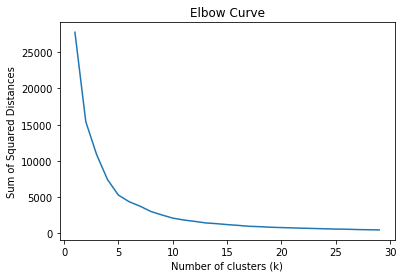

In [66]:
# Plot the elbow curve to determine the optimal value of k
plt.plot(k_range, sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')
plt.show()

In [67]:
# Fit the KMeans model to the data with the selected value of k
kmeans = KMeans(n_clusters=5)

kmeans.fit(selected_df)
centers = kmeans.cluster_centers_ 
kmeans_pred = kmeans.predict(selected_df)
# Print The lowest SSE value
kmeans.inertia_
# Evaluate model accuracy
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
# Calculate the Silhouette score
silhouette_score = silhouette_score(selected_df, kmeans.labels_, metric='euclidean')

# Print the Silhouette score
print("Silhouette Score:", silhouette_score)



Silhouette Score: 0.6156384565857095


In [68]:
# Add the cluster labels to the original dataframe
merged_df["cluster"] = kmeans.labels_
# selected_df["cluster"] = kmeans.labels_

In [69]:
# Final locations of the centroid
kmeans.cluster_centers_ 

array([[ 4.40414344e-01, -5.46590799e-01, -4.17700500e-01],
       [-7.95811981e-01, -3.10620926e-02,  6.92401211e-01],
       [ 3.92741355e+01, -5.41914764e-01, -4.18423170e-01],
       [-8.85879235e-01,  1.82691903e+00,  2.70674848e-01],
       [-8.75577744e-01,  1.23978409e+00,  4.31114523e+00]])

In [70]:
# The number of iterations required to converge
kmeans.n_iter_

9

In [71]:
# merged_df

In [72]:
# Calculate the number of charging points in each cluster
cluster_counts = merged_df.groupby("cluster")["Total: All usual residents aged 16 or over in employment the week before the Census"].sum()


In [73]:
# Print the cluster counts
print(cluster_counts)

cluster
0    192666052.0
1     99733749.0
2        96300.0
3     95037828.0
4     54621111.0
Name: Total: All usual residents aged 16 or over in employment the week before the Census, dtype: float64


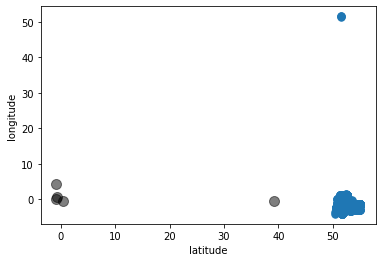

In [74]:
merged_df.plot.scatter(x = 'latitude', y = 'longitude', s=55, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=100, alpha=0.5)

In [75]:
# pip install folium matplotlib mapclassify

In [76]:

# plotting the clusters on map of uk
import geopandas as gpd
import requests
import geopandas
import folium
gdf = geopandas.GeoDataFrame(
    merged_df, geometry=geopandas.points_from_xy(merged_df.longitude, merged_df.latitude))
# gdf
# gdf2 = geopandas.GeoDataFrame(
#     selected_df, geometry=geopandas.points_from_xy(selected_df.longitude, selected_df.latitude))
# gdf2
# Define the map centered on the UK
uk_map = folium.Map(location=[54.5, -3.2], zoom_start=6, tiles='cartodbpositron')

# gdf2.explore('cluster', categorical=True)
# m = gdf2.explore(
#  column="cluster",  # make choropleth based on column
#  #scheme="Percentiles",  # use mapclassify's natural 
#  breaks scheme
#  legend=True, # show legend
#  k=1, # number of bins
#  legend_kwds=dict(colorbar=True), # do not use colorbar
#  #name="Trips" # name of the layer in the map,
# #cmap='tab10'
# )
# m
gdf.to_csv("gdf.csv")

In [77]:
import pandas as pd
import geopandas as gpd
import folium

# Load the GeoDataFrame from the CSV file
# gdf = gpd.read_file('gdf.csv')

# Define the map centered on the UK
uk_map = folium.Map(location=[54.5, -3.2], zoom_start=6, tiles='cartodbpositron')

# Define a list of colors for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Add a marker for each point, colored by its cluster
for index, row in gdf.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], 
                        radius=3, 
                        color=colors[row['cluster']], 
                        fill=True, 
                        fill_color=colors[row['cluster']]).add_to(uk_map)

# Display the map
uk_map

In [78]:
gdf

chargeDeviceID       reference  \
7      eb1848290d5a7de9c9ccabc67fefa211        PP-12290   
8      91e50fe1e39af2869d3336eaaeebdb43        PP-12292   
9      1c66f4627f1b9679f8db47d1287d7e98        PP-12463   
10     6e2eec9ca19c076736d19ac5426473af        PP-12309   
11     a6ade5aa93b826f8de63c663e1159bf7        PP-12398   
...                                 ...             ...   
11879  61aa5ce958748d92d1a26b56a9525730  suby1100009654   
11880  dd417a1a8dbceb05990f0b972107a99f  suby1100009657   
11881  906d5920ee90a983ae36ae31689eef9e  suby1100009660   
11882  d44182c4aacdb54f6645f3becb78c249  suby1100009665   
11883  6d54054285d41e43f72b3e9e55d597fa  suby1100009668   

                               name   latitude  longitude subBuildingName  \
7               Beadles Nissan Ltd   51.451127   0.050619             NaN   
8                   Benfield Motors  54.978947  -1.599306             NaN   
9       FJ Chalke Nissan Dealership  51.050969  -2.419992             NaN   
10     Fred Coupe Nissan Dealership  53.741788  -2.670642             NaN   
11                  G24 Innovations  51.506864  -3.101256             NaN   
...                             ...        ...        ...             ...   
11879                suby1100009654  51.455518  -0.325212             NaN   
11880                suby1100009657  51.463317  -0.292947             NaN   
11881                suby1100009660  51.451911  -0.335985             NaN   
11882                suby1100009665  51.452285  -0.318079             NaN   
11883                suby1100009668  51.455710  -0.324537             NaN   

      buildingName buildingNumber           thoroughfare  \
7              NaN          43-53     Eltham High Street   
8              NaN            176          Portland Road   
9              NaN            NaN              Saxon Way   
10             NaN          24-26           Chorley Road   
11             NaN            NaN        Wentloog Avenue   
...            ...            ...                    ...   
11879          NaN            NaN  54 South Western Road   
11880          NaN            NaN      27 Townshend Road   
11881          NaN            NaN    24 Heathfield South   
11882          NaN            NaN        3 Norman Avenue   
11883          NaN            NaN  39 South Western Road   

                        street  ...  \
7                          NaN  ...   
8                          NaN  ...   
9      Wincanton Business Park  ...   
10                         NaN  ...   
11                     CF3 2GH  ...   
...                        ...  ...   
11879                      NaN  ...   
11880                      NaN  ...   
11881                      NaN  ...   
11882                      NaN  ...   
11883                      NaN  ...   

      N Administrative and support service activities  \
7                                              1445.0   
8                                              3120.0   
9                                              1747.0   
10                                             1438.0   
11                                             4384.0   
...                                               ...   
11879                                          1551.0   
11880                                          1551.0   
11881                                          1551.0   
11882                                          1551.0   
11883                                          1551.0   

      O Public administration and defence; compulsory social security  \
7                                                 3596.0                
8                                                 7048.0                
9                                                 4243.0                
10                                                2262.0                
11                                               11563.0                
...                                                  ...                
11879

In [79]:
#  comparing with neural network aproach with sequatial neural network
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [80]:
# Load the dataset
df =gdf.dropna(subset = ['Total: All usual residents aged 16 or over in employment the week before the Census'])

# Select the relevant features
X = df[['latitude', 'longitude', 'Total: All usual residents aged 16 or over in employment the week before the Census', "connector1RatedOutputKW"]]
y = df['connector1OutputCurrent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df

chargeDeviceID       reference  \
7      eb1848290d5a7de9c9ccabc67fefa211        PP-12290   
8      91e50fe1e39af2869d3336eaaeebdb43        PP-12292   
9      1c66f4627f1b9679f8db47d1287d7e98        PP-12463   
10     6e2eec9ca19c076736d19ac5426473af        PP-12309   
11     a6ade5aa93b826f8de63c663e1159bf7        PP-12398   
...                                 ...             ...   
11879  61aa5ce958748d92d1a26b56a9525730  suby1100009654   
11880  dd417a1a8dbceb05990f0b972107a99f  suby1100009657   
11881  906d5920ee90a983ae36ae31689eef9e  suby1100009660   
11882  d44182c4aacdb54f6645f3becb78c249  suby1100009665   
11883  6d54054285d41e43f72b3e9e55d597fa  suby1100009668   

                               name   latitude  longitude subBuildingName  \
7               Beadles Nissan Ltd   51.451127   0.050619             NaN   
8                   Benfield Motors  54.978947  -1.599306             NaN   
9       FJ Chalke Nissan Dealership  51.050969  -2.419992             NaN   
10     Fred Coupe Nissan Dealership  53.741788  -2.670642             NaN   
11                  G24 Innovations  51.506864  -3.101256             NaN   
...                             ...        ...        ...             ...   
11879                suby1100009654  51.455518  -0.325212             NaN   
11880                suby1100009657  51.463317  -0.292947             NaN   
11881                suby1100009660  51.451911  -0.335985             NaN   
11882                suby1100009665  51.452285  -0.318079             NaN   
11883                suby1100009668  51.455710  -0.324537             NaN   

      buildingName buildingNumber           thoroughfare  \
7              NaN          43-53     Eltham High Street   
8              NaN            176          Portland Road   
9              NaN            NaN              Saxon Way   
10             NaN          24-26           Chorley Road   
11             NaN            NaN        Wentloog Avenue   
...            ...            ...                    ...   
11879          NaN            NaN  54 South Western Road   
11880          NaN            NaN      27 Townshend Road   
11881          NaN            NaN    24 Heathfield South   
11882          NaN            NaN        3 Norman Avenue   
11883          NaN            NaN  39 South Western Road   

                        street  ...  \
7                          NaN  ...   
8                          NaN  ...   
9      Wincanton Business Park  ...   
10                         NaN  ...   
11                     CF3 2GH  ...   
...                        ...  ...   
11879                      NaN  ...   
11880                      NaN  ...   
11881                      NaN  ...   
11882                      NaN  ...   
11883                      NaN  ...   

      N Administrative and support service activities  \
7                                              1445.0   
8                                              3120.0   
9                                              1747.0   
10                                             1438.0   
11                                             4384.0   
...                                               ...   
11879                                          1551.0   
11880                                          1551.0   
11881                                          1551.0   
11882                                          1551.0   
11883                                          1551.0   

      O Public administration and defence; compulsory social security  \
7                                                 3596.0                
8                                                 7048.0                
9                                                 4243.0                
10                                                2262.0                
11                                               11563.0                
...                                                  ...                
11879

In [81]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = df

# Prepare data
X = data[['latitude', 'longitude', 'Total: All usual residents aged 16 or over in employment the week before the Census']] # Features
y = data['connector1OutputCurrent'] # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test)

# Evaluate model accuracy
rfc_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', rfc_accuracy)



# # Use the trained model to predict good locations to set up EV chargers
# new_data = pd.read_csv('new_locations.csv') # Replace with your own dataset of new locations
# X_new = new_data[['latitude', 'longitude', 'power_kW']]
# predictions = clf.predict(X_new)
# print('Predictions:', predictions)

Accuracy: 0.7763371150729336


In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print('Naive Bayes Accuracy Score:', gnb_accuracy)

Naive Bayes Accuracy Score: 0.4737979470556456


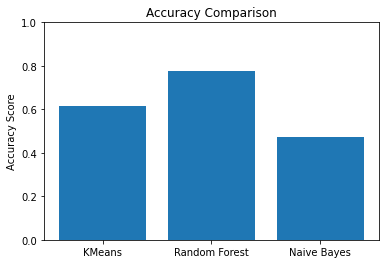

In [84]:
labels = ['KMeans', 'Random Forest', 'Naive Bayes']
scores = [silhouette_score, rfc_accuracy, gnb_accuracy]

plt.bar(labels, scores)
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison')
plt.show()